# Exercise

Modify the code as per the below instructions
- Use a different dataset.
- Choose a different embedding like word2vec or gensim, if applicable.
- Modify the architecture, as below
    - Single layer of LSTM and FC
    - Two layers of LSTM and FC
- Change the number of LSTM units in each layer.



In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-03-06 10:19:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-06 10:19:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-06 10:19:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**20 Newsgroups dataset**

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data  # Fetch the text data
target = newsgroups.target  # Fetch the labels

In [ ]:
# Preparing dataset

# Tokenize the text data
max_features = 20000  # Vocabulary size
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to ensure uniform length
X = pad_sequences(sequences, maxlen=25)

# Encode the labels to integers
encoder = LabelEncoder()
Y = encoder.fit_transform(target)
Y = tf.keras.utils.to_categorical(Y, num_classes=len(encoder.classes_))

# Split into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Load GloVe embeddings
embedding_dim = 100  # This should match the GloVe vectors you chose
embedding_matrix = np.zeros((max_features, embedding_dim))

# path to your GloVe file
glove_path = 'glove.6B.100d.txt'
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        if word in tokenizer.word_index and tokenizer.word_index[word] < max_features:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_matrix[tokenizer.word_index[word]] = coefs

print('shape of input data')
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

In [ ]:
# Build the model
lstmModel = keras.models.Sequential()
lstmModel.add(keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                                     weights=[embedding_matrix], trainable=False))
lstmModel.add(keras.layers.LSTM(128, dropout=0.2, return_sequences=True))
lstmModel.add(keras.layers.LSTM(128, dropout=0.2))
lstmModel.add(keras.layers.Dense(len(encoder.classes_), activation='softmax'))

lstmModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 20)                2580      
                                                                 
Total params: 2251412 (8.59 MB)
Trainable params: 251412 (982.08 KB)
Non-trainable params: 2000000 (7.63 MB)
_________________________________________________________________


In [ ]:
# Train the model
history = lstmModel.fit(Xtrain, Ytrain, epochs=15, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/15
754/754 [==============================] - 49s 57ms/step - loss: 2.5111 - accuracy: 0.2140 - val_loss: 2.1730 - val_accuracy: 0.3302
Epoch 2/15
754/754 [==============================] - 46s 60ms/step - loss: 2.0633 - accuracy: 0.3635 - val_loss: 1.9582 - val_accuracy: 0.4098
Epoch 3/15
754/754 [==============================] - 44s 59ms/step - loss: 1.8580 - accuracy: 0.4294 - val_loss: 1.8670 - val_accuracy: 0.4373
Epoch 4/15
754/754 [==============================] - 42s 56ms/step - loss: 1.7008 - accuracy: 0.4734 - val_loss: 1.8113 - val_accuracy: 0.4523
Epoch 5/15
754/754 [==============================] - 50s 67ms/step - loss: 1.5653 - accuracy: 0.5256 - val_loss: 1.7495 - val_accuracy: 0.4834
Epoch 6/15
754/754 [==============================] - 44s 59ms/step - loss: 1.4420 - accuracy: 0.5569 - val_loss: 1.7070 - val_accuracy: 0.4990
Epoch 7/15
754/754 [==============================] - 41s 54ms/step - loss: 1.3226 - accuracy: 0.5926 - val_loss: 1.6849 - val_accuracy:

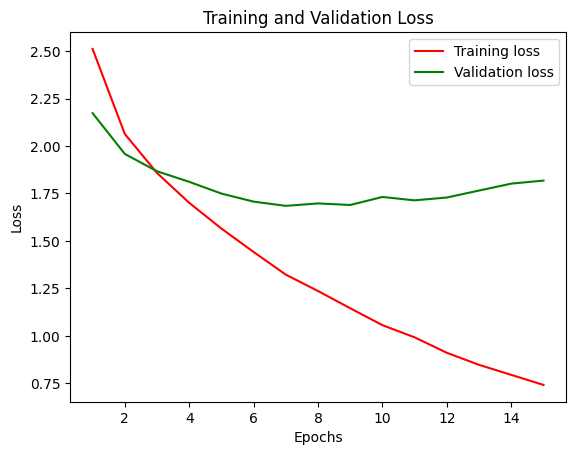

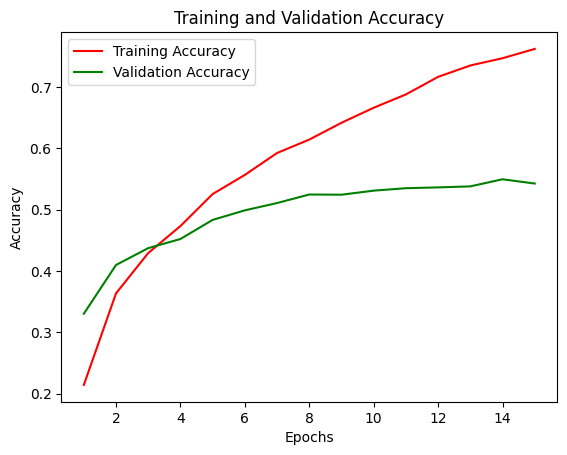

118/118 [==============================] - 7s 57ms/step - loss: 1.8081 - accuracy: 0.5459
Test Loss: 1.8080776929855347, Test Accuracy: 0.5458886027336121


In [ ]:
# Plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
acc = history.history['accuracy']  # Change 'acc' to 'accuracy' if needed
val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy' if needed
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on test data
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(f'Test Loss: {testLoss}, Test Accuracy: {testAccuracy}')

118/118 [==============================] - 10s 84ms/step - loss: 1.8081 - accuracy: 0.5459
Test Loss: 1.8080776929855347, Test Accuracy: 0.5458886027336121
